In [4]:
!pip install -U langchain-community

In [ ]:

!pip install langchain langchain_openai openai tiktoken chromadb pandas nltk bs4 requests python-dotenv

# Import necessary libraries
import os
import requests
import pandas as pd
import nltk
from bs4 import BeautifulSoup
from dotenv import load_dotenv
import numpy as np
from datetime import datetime

# LangChain and OpenAI imports
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain.vectorstores import Chroma
from langchain.schema import Document
from langchain.prompts import ChatPromptTemplate
from langchain.schema.runnable import RunnablePassthrough
from langchain.schema.output_parser import StrOutputParser

# Download NLTK resources for text preprocessing
nltk.download('punkt')

# Load environment variables (API keys)
load_dotenv()

# Set OpenAI API key  
#os.environ["OPENAI_API_KEY"] = #openai key

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# 1. Data Collection

def scrape_crypto_articles(num_articles=10):
    """
    Scrape cryptocurrency news articles from a sample source.
    In a production system, you'd use more reliable sources with proper API access.
    """
    print("Fetching cryptocurrency articles...")



    sample_articles = [
        {
            "title": "Bitcoin Hits New All-Time High Amid Institutional Adoption",
            "content": "Bitcoin has reached a new all-time high as institutional investors continue to adopt the cryptocurrency. Major corporations have added Bitcoin to their balance sheets, viewing it as a hedge against inflation. The cryptocurrency has shown significant volatility in the past, but has demonstrated strong recovery patterns. Analysts suggest this trend could continue as mainstream adoption increases.",
            "date": "2025-03-15",
            "source": "CryptoNews",
            "url": "https://example.com/bitcoin-ath",
            "tickers": ["BTC"]
        },
        {
            "title": "Ethereum's Shift to Proof-of-Stake Reduces Energy Consumption by 99%",
            "content": "Ethereum has successfully completed its transition to a Proof-of-Stake consensus mechanism, reducing its energy consumption by approximately 99%. This eco-friendly shift has attracted more environmentally conscious investors. The upgrade also introduces enhanced scalability features and reduced gas fees for transactions, making the network more accessible for smaller investors and developers. These improvements could position Ethereum for long-term growth in the smart contract platform market.",
            "date": "2025-03-10",
            "source": "BlockchainInsider",
            "url": "https://example.com/ethereum-pos",
            "tickers": ["ETH"]
        },
        {
            "title": "Cardano Launches New DeFi Platform, ADA Price Surges",
            "content": "Cardano has launched a new decentralized finance platform, causing its native token ADA to surge in price. The platform aims to provide financial services to unbanked populations. Cardano's methodical, research-driven approach to development has been criticized for slow progress but praised for security and reliability. Its focus on academic rigor and formal verification methods makes it attractive for risk-averse investors looking for sustainable growth rather than quick gains.",
            "date": "2025-03-12",
            "source": "DeFiDaily",
            "url": "https://example.com/cardano-defi",
            "tickers": ["ADA"]
        },
        {
            "title": "Solana Network Experiences Growth in NFT Market Share",
            "content": "Solana's blockchain has been gaining significant traction in the NFT marketplace, challenging Ethereum's dominance. The network's high throughput and low transaction fees have made it attractive to NFT creators and collectors. Despite past network outages affecting confidence, recent protocol upgrades have improved stability. Solana's ecosystem continues to expand with new projects and applications, potentially offering high growth opportunities alongside higher technical risks.",
            "date": "2025-03-16",
            "source": "NFTWorld",
            "url": "https://example.com/solana-nfts",
            "tickers": ["SOL"]
        },
        {
            "title": "Ripple Wins Regulatory Clarity in Major Markets",
            "content": "Ripple has secured regulatory clarity in several major markets, boosting confidence in XRP. The company continues to expand its cross-border payment solutions with financial institutions globally. Regulatory developments have had significant impact on XRP's price volatility. Despite legal challenges in some jurisdictions, Ripple's underlying technology for international transfers remains compelling for financial institutions seeking efficiency improvements.",
            "date": "2025-03-05",
            "source": "CryptoRegulation",
            "url": "https://example.com/ripple-regulations",
            "tickers": ["XRP"]
        },
        {
            "title": "Binance Coin Grows as Exchange Expands Services",
            "content": "Binance Coin (BNB) has seen steady growth as the Binance exchange continues to expand its service offerings. The token's utility within the Binance ecosystem provides it with practical use cases beyond speculation. Binance's regular token burns reduce supply, potentially supporting price appreciation. However, regulatory scrutiny of centralized exchanges presents ongoing compliance challenges and risks for the associated token.",
            "date": "2025-03-20",
            "source": "ExchangeNews",
            "url": "https://example.com/bnb-growth",
            "tickers": ["BNB"]
        },
        {
            "title": "Polkadot Parachains Show Promise for Interoperability Solutions",
            "content": "Polkadot's parachain ecosystem is demonstrating promising results for blockchain interoperability. The network's ability to connect different blockchains could solve major fragmentation issues in the crypto space. Polkadot's unique architecture allows specialized blockchains to operate with shared security, creating opportunities for niche applications with cross-chain capabilities. This technical approach could provide significant long-term value if wider blockchain adoption continues across industries.",
            "date": "2025-03-08",
            "source": "InteropTech",
            "url": "https://example.com/polkadot-parachains",
            "tickers": ["DOT"]
        },
        {
            "title": "Algorand Partners with Central Banks for CBDC Development",
            "content": "Algorand has announced partnerships with multiple central banks for central bank digital currency (CBDC) development projects. These high-profile collaborations highlight the platform's institutional-grade capabilities. Algorand's pure proof-of-stake protocol offers deterministic finality and carbon-negative operations, making it suitable for regulated financial applications. Such partnerships could establish Algorand as a key player in the institutional blockchain space, though retail adoption remains more limited than some competitors.",
            "date": "2025-03-18",
            "source": "CBDCInsights",
            "url": "https://example.com/algorand-cbdc",
            "tickers": ["ALGO"]
        },
        {
            "title": "Chainlink Expands Data Oracle Services Beyond Crypto",
            "content": "Chainlink has expanded its oracle services beyond the cryptocurrency sector, now providing data feeds to traditional financial markets. This broadening use case strengthens Chainlink's position as the leading decentralized oracle network. The project's focus on reliable data provision has made it essential infrastructure for many DeFi applications. As more industries require tamper-proof data for smart contracts, Chainlink's utility and potential market continue to grow, offering a unique investment profile tied to the broader blockchain ecosystem rather than any single platform.",
            "date": "2025-03-14",
            "source": "DeFiInsider",
            "url": "https://example.com/chainlink-expansion",
            "tickers": ["LINK"]
        },
        {
            "title": "Avalanche Subnet Technology Enables Custom Blockchain Deployment",
            "content": "Avalanche's subnet technology is enabling enterprises to deploy custom blockchains tailored to specific requirements. This flexibility has attracted projects from gaming to finance seeking scalable blockchain solutions. Avalanche's architecture balances decentralization with high performance, processing thousands of transactions per second with sub-second finality. The platform's ability to host application-specific blockchains positions it as a versatile foundation for next-generation Web3 services, potentially capturing market share across multiple verticals simultaneously.",
            "date": "2025-03-09",
            "source": "EnterpriseChain",
            "url": "https://example.com/avalanche-subnets",
            "tickers": ["AVAX"]
        }
    ]

    # Create a DataFrame for easier manipulation
    df = pd.DataFrame(sample_articles)
    print(f"Collected {len(df)} articles")
    return df

# Option 1: Using News APIs


In [7]:
!pip install requests beautifulsoup4 feedparser

In [ ]:
def scrape_crypto_articles_api(num_articles=10):
    """Fetch cryptocurrency news using a news API"""
    import requests
    import os
    from datetime import datetime, timedelta

    # Option 1: NewsAPI.org
    # Sign up at https://newsapi.org for an API key (free tier available)
    #api_key = os.getenv("NEWS_API_KEY", #KEY)

    # Set parameters
    days_back = 7
    from_date = (datetime.now() - timedelta(days=days_back)).strftime('%Y-%m-%d')

    url = "https://newsapi.org/v2/everything"
    params = {
        "q": "cryptocurrency OR bitcoin OR ethereum OR blockchain",
        "language": "en",
        "sortBy": "publishedAt",
        "from": from_date,
        "apiKey": api_key,
        "pageSize": num_articles
    }

    print(f"Fetching cryptocurrency news from the past {days_back} days...")

    try:
        response = requests.get(url, params=params)
        data = response.json()

        if response.status_code == 200 and data.get("status") == "ok":
            articles = []

            for article in data.get("articles", []):
                # Extract cryptocurrency tickers mentioned in the title/description
                content = (article.get("title", "") + " " + article.get("description", "")).lower()
                tickers = []
                for ticker in ["BTC", "ETH", "ADA", "SOL", "XRP", "BNB", "DOT", "AVAX", "LINK", "ALGO"]:
                    if ticker.lower() in content or ticker in content:
                        tickers.append(ticker)

                # Default to general crypto if no specific ticker found
                if not tickers:
                    tickers = ["CRYPTO"]

                articles.append({
                    "title": article.get("title", ""),
                    "content": article.get("description", "") + " " + article.get("content", ""),
                    "date": article.get("publishedAt", "")[:10],
                    "source": article.get("source", {}).get("name", ""),
                    "url": article.get("url", ""),
                    "tickers": tickers
                })

            # Create DataFrame
            df = pd.DataFrame(articles)
            print(f"Collected {len(df)} articles from News API")
            return df
        else:
            print(f"Error fetching news: {data.get('message', 'Unknown error')}")
            # Fall back to sample data
            return scrape_crypto_articles(num_articles)

    except Exception as e:
        print(f"Exception when fetching news: {e}")
        # Fall back to sample data
        return scrape_crypto_articles(num_articles)

# Option 2: Direct Web Scraping

In [9]:
# 2. Document Processing

def process_articles_to_documents(articles_df):
    """Convert articles DataFrame into LangChain Document objects."""
    documents = []

    for _, row in articles_df.iterrows():
        # Create metadata for better retrieval context
        metadata = {
            "title": row["title"],
            "date": row["date"],
            "source": row["source"],
            "url": row["url"],
            "tickers": ",".join(row["tickers"])
        }

        # Create Document object with content and metadata
        doc = Document(
            page_content=f"Title: {row['title']}\n\nContent: {row['content']}",
            metadata=metadata
        )
        documents.append(doc)

    print(f"Processed {len(documents)} documents with metadata")
    return documents

# Function to split documents into chunks for embedding
def split_documents(documents):
    """Split documents into smaller chunks for better retrieval."""
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=500,
        chunk_overlap=50,
        separators=["\n\n", "\n", ". ", " ", ""]
    )

    chunks = text_splitter.split_documents(documents)
    print(f"Split documents into {len(chunks)} chunks")
    return chunks


In [10]:
# 3. Vector Store Creation

def create_vector_store(chunks):
    """Create a vector store from document chunks using OpenAI embeddings."""
    # Initialize OpenAI embeddings
    embeddings = OpenAIEmbeddings()

    # Create vector store - using Chroma for in-memory storage
    # In production, you might want to use Supabase, Pinecone, or another persistent vector store
    vector_store = Chroma.from_documents(
        documents=chunks,
        embedding=embeddings
    )

    print("Vector store created successfully")
    return vector_store

In [11]:
# 4. User Profile Processing

def generate_search_queries(risk_profile):
    """
    Generate appropriate search queries based on user's risk profile.
    Different risk tolerance levels will prioritize different aspects of cryptocurrencies.
    """
    queries = []

    if risk_profile.lower() == "conservative" or risk_profile.lower() == "low":
        queries = [
            "stable cryptocurrency with low volatility",
            "established cryptocurrency with institutional adoption",
            "cryptocurrency with strong regulatory compliance",
            "blue-chip cryptocurrency long-term investment"
        ]
    elif risk_profile.lower() == "moderate" or risk_profile.lower() == "medium":
        queries = [
            "balanced risk-reward cryptocurrency",
            "cryptocurrency with growing adoption",
            "established altcoins with utility",
            "mid-cap cryptocurrency with potential"
        ]
    elif risk_profile.lower() == "aggressive" or risk_profile.lower() == "high":
        queries = [
            "high potential growth cryptocurrency",
            "emerging cryptocurrency projects",
            "innovative blockchain technology",
            "new cryptocurrency with unique features"
        ]
    else:
        # Default to a mix of queries
        queries = [
            "reliable cryptocurrency investment",
            "cryptocurrency market trends",
            "promising cryptocurrency projects",
            "cryptocurrency adoption and growth"
        ]

    print(f"Generated {len(queries)} search queries for {risk_profile} risk profile")
    return queries


In [12]:
# 5. Retrieval System

def retrieve_relevant_chunks(vector_store, queries, top_k=3):
    """
    Retrieve relevant document chunks based on generated queries.
    Combines results from multiple queries for better coverage.
    """
    all_docs = []

    for query in queries:
        docs = vector_store.similarity_search(query, k=top_k)
        all_docs.extend(docs)

    # Remove duplicates while preserving order
    unique_docs = []
    seen_content = set()

    for doc in all_docs:
        content = doc.page_content
        if content not in seen_content:
            seen_content.add(content)
            unique_docs.append(doc)

    print(f"Retrieved {len(unique_docs)} unique relevant chunks")
    return unique_docs


In [13]:
# 6. LLM Response Generation

def create_rag_chain(risk_profile):
    """Create a RAG chain that combines retrieval with LLM generation."""

    # Initialize LLM
    llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.2)

    # Create the prompt template
    prompt = ChatPromptTemplate.from_template("""
    You are a cryptocurrency investment advisor specializing in providing personalized advice based on current market information.

    User Risk Profile: {risk_profile}
    Current Date: {current_date}

    Based on the following recent cryptocurrency articles and information, provide investment recommendations tailored to the user's risk profile:

    {context}

    Instructions:
    1. Analyze the provided information and identify cryptocurrencies that match the user's {risk_profile} risk profile.
    2. Provide 2-4 specific cryptocurrency recommendations with clear reasoning.
    3. For each recommendation, include:
       - Name and ticker symbol
       - Why it fits the user's risk profile
       - Key strengths and potential risks
       - Suggested allocation percentage (approximate)
    4. Add a brief market overview based on the recent articles.
    5. Include appropriate disclaimers about cryptocurrency investments.

    Your recommendations should be balanced, evidence-based, and clearly connected to the user's risk tolerance.
    """)

    # Create the RAG chain
    chain = (
        {"context": lambda x: x, "risk_profile": lambda _: risk_profile, "current_date": lambda _: datetime.now().strftime("%Y-%m-%d")}
        | prompt
        | llm
        | StrOutputParser()
    )

    return chain

In [14]:
# 7. Main RAG System Function
# ---------------------------

def crypto_advisor_rag(risk_profile):
    """
    Main function that orchestrates the RAG system workflow.
    1. Collects and processes cryptocurrency articles
    2. Creates vector store
    3. Generates queries based on user risk profile
    4. Retrieves relevant information
    5. Generates personalized investment advice
    """
    print(f"Starting cryptocurrency advisor for {risk_profile} risk profile...")

    # Step 1: Collect articles
    articles_df = scrape_crypto_articles_api()

    # Step 2: Process articles into documents
    documents = process_articles_to_documents(articles_df)

    # Step 3: Split documents into chunks
    chunks = split_documents(documents)

    # Step 4: Create vector store
    vector_store = create_vector_store(chunks)

    # Step 5: Generate search queries based on risk profile
    queries = generate_search_queries(risk_profile)

    # Step 6: Retrieve relevant chunks
    relevant_chunks = retrieve_relevant_chunks(vector_store, queries)

    # Step 7: Create and run RAG chain
    rag_chain = create_rag_chain(risk_profile)
    response = rag_chain.invoke(relevant_chunks)

    print("Investment advice generated successfully!")
    return response


In [15]:
# 8. User Interface Function
# --------------------------

def get_investment_advice():
    """
    Simple function to collect user input and display results.
    In a real application, this would be a web or mobile interface.
    """
    print("Welcome to the Cryptocurrency Investment Advisor!")
    print("=" * 50)

    # Get user's risk profile
    print("\nPlease specify your risk tolerance:")
    print("1: Conservative (Low risk)")
    print("2: Moderate (Medium risk)")
    print("3: Aggressive (High risk)")

    risk_choice = input("\nEnter your choice (1-3): ")

    risk_profile_map = {
        "1": "Conservative",
        "2": "Moderate",
        "3": "Aggressive"
    }

    risk_profile = risk_profile_map.get(risk_choice, "Moderate")

    print(f"\nGenerating investment advice for {risk_profile} risk profile...")
    print("This may take a moment while we analyze the latest cryptocurrency information.")

    # Get investment advice
    advice = crypto_advisor_rag(risk_profile)

    print("\n" + "=" * 50)
    print("Your Personalized Cryptocurrency Investment Advice:")
    print("=" * 50)
    print(advice)


In [16]:
sample_advice = crypto_advisor_rag("Moderate")
print("\nSample Investment Advice for Moderate Risk Profile:")
print("=" * 60)
print(sample_advice)



Starting cryptocurrency advisor for Moderate risk profile...
Fetching cryptocurrency news from the past 7 days...
Collected 10 articles from News API
Processed 10 documents with metadata
Split documents into 15 chunks
Vector store created successfully
Generated 4 search queries for Moderate risk profile
Retrieved 6 unique relevant chunks
Investment advice generated successfully!

Sample Investment Advice for Moderate Risk Profile:
Based on the recent articles and information provided, here are some cryptocurrency recommendations tailored to your Moderate risk profile:

1. Ethereum (ETH)
   - Fits the user's risk profile: Ethereum is a well-established cryptocurrency with a strong track record and a large market cap, making it relatively less volatile compared to smaller altcoins.
   - Key strengths: Ethereum is a leading smart contract platform with a wide range of decentralized applications (dApps) built on its blockchain. It also has a strong development team and community support.
 


<font size="10">**IMPLEMENTING ALL PHASES** </font>

In [47]:
#POS Tagging with spaCy

# Recreate df if needed
df = scrape_crypto_articles()

# POS Tagging with spaCy
!pip install -U spacy
!python -m spacy download en_core_web_sm

import spacy
nlp = spacy.load("en_core_web_sm")

# Apply POS tagging
df['pos_tags'] = df['content'].apply(lambda text: [(token.text, token.pos_) for token in nlp(text)])

# View result
df[['title', 'pos_tags']].head()

# POS Tagging with spaCy
!pip install -U spacy
!python -m spacy download en_core_web_sm

import spacy
nlp = spacy.load("en_core_web_sm")

# Apply POS tagging
df['pos_tags'] = df['content'].apply(lambda text: [(token.text, token.pos_) for token in nlp(text)])

# View result
df[['title', 'pos_tags']].head()


Fetching cryptocurrency articles...
Collected 10 articles
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 110.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


,title,pos_tags
0,Bitcoin Hits New All-Time High Amid Institutio...,"[(Bitcoin, PROPN), (has, AUX), (reached, VERB)..."
1,Ethereum's Shift to Proof-of-Stake Reduces Ene...,"[(Ethereum, PROPN), (has, AUX), (successfully,..."
2,"Cardano Launches New DeFi Platform, ADA Price ...","[(Cardano, PROPN), (has, AUX), (launched, VERB..."
3,Solana Network Experiences Growth in NFT Marke...,"[(Solana, PROPN), ('s, PART), (blockchain, NOU..."
4,Ripple Wins Regulatory Clarity in Major Markets,"[(Ripple, PROPN), (has, AUX), (secured, VERB),..."


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

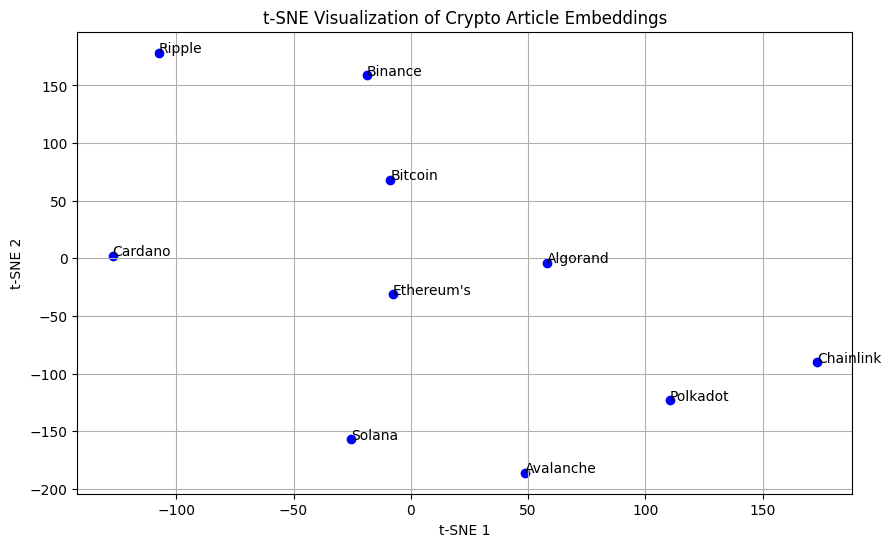

In [19]:
#  Word Embeddings with BERT + t-SNE Visualization

# t-SNE with fixed perplexity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer  # Import SentenceTransformer

# Create matrix again if needed
# Instead of accessing 'embeddings', compute them using SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')  # Load a pre-trained model
df['embeddings'] = df['content'].apply(lambda text: model.encode(text))  # Compute and store embeddings
embedding_matrix = np.vstack(df['embeddings'].values)

# Apply t-SNE with valid perplexity
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_results = tsne.fit_transform(embedding_matrix)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue')
for i, title in enumerate(df['title']):
    plt.annotate(title.split()[0], (tsne_results[i, 0], tsne_results[i, 1]))
plt.title("t-SNE Visualization of Crypto Article Embeddings")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()










**<font size="6"># Phase 2: Prompt Engineering with Chain of Thought (CoT), Tree of Thought (ToT), and Graph of Thought (GoT)</font>**



In [21]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_openai import ChatOpenAI

# Define a CoT-style prompt
cot_prompt = PromptTemplate(
    input_variables=["question"],
    template="""
You are a cryptocurrency investment advisor. Analyze the user's question step by step before giving an answer.

Question: {question}

Let's break this down step-by-step:
1.
"""
)

# Load LLM
llm = ChatOpenAI(temperature=0.3)

# Create chain
cot_chain = LLMChain(llm=llm, prompt=cot_prompt)

# Try it
response = cot_chain.run("Should I invest in Solana this month?")
print(response)


Consider the current market conditions: It is important to assess the overall market conditions for cryptocurrencies, as they can have a significant impact on the performance of individual coins like Solana. Look at factors such as the overall market trend, investor sentiment, and any upcoming events or news that could affect the market.

2. 
Evaluate Solana's performance: Look at how Solana has been performing recently in terms of price movement, trading volume, and market capitalization. Consider whether it has been showing consistent growth or if there have been any significant fluctuations.

3.
Research Solana's fundamentals: Dive into the fundamentals of Solana, such as its technology, team, partnerships, and roadmap. Evaluate whether Solana has a strong foundation that could support future growth and adoption.

4.
Consider your own investment goals and risk tolerance: Think about why you are considering investing in Solana and what your investment goals are. Consider whether Sola

In [22]:
# 2. Tree of Thought (ToT)

def recommend_crypto(risk_tolerance, market_trend, use_case_focus):
    # Basic branching logic
    if risk_tolerance == "low":
        if market_trend == "bullish":
            return "Consider BTC or ETH – lower volatility, high market cap."
        else:
            return "Stay conservative. Hold or consider stablecoins."
    elif risk_tolerance == "medium":
        if use_case_focus == "DeFi":
            return "Explore ADA or LINK – active development and network usage."
        elif use_case_focus == "NFT":
            return "SOL or AVAX – strong performance in NFT ecosystems."
    else:  # high risk
        return "Look at smaller caps like ALGO, DOT, or niche tokens – high potential, high risk."

# Example
recommend_crypto("medium", "bullish", "NFT")


'SOL or AVAX – strong performance in NFT ecosystems.'

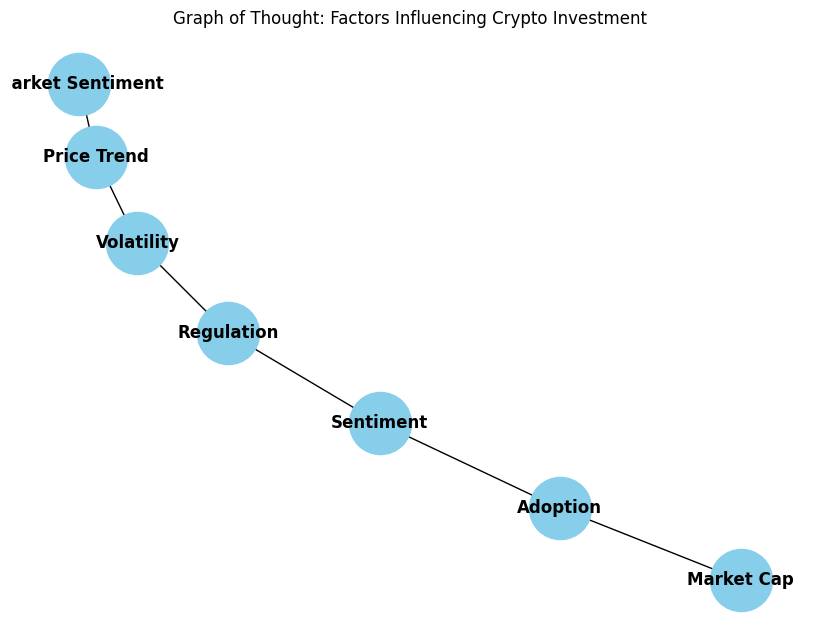

In [23]:
# Graph of Thought (GoT)

!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Add nodes
concepts = ["Market Sentiment", "Adoption", "Volatility", "Regulation", "Market Cap", "Price Trend"]
G.add_nodes_from(concepts)

# Add edges (relationships)
edges = [
    ("Market Sentiment", "Price Trend"),
    ("Adoption", "Market Cap"),
    ("Regulation", "Volatility"),
    ("Volatility", "Price Trend"),
    ("Adoption", "Sentiment"),
    ("Regulation", "Sentiment")
]
G.add_edges_from(edges)

# Draw
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color="skyblue", node_size=2000, font_size=12, font_weight="bold")
plt.title("Graph of Thought: Factors Influencing Crypto Investment")
plt.show()









**<font size="14">Phase 3: RAG Enhancements</font>**



In [24]:
# 1. Ingest New Crypto Articles (Simulated)

# Optional: Add fresh articles from a live source or manual list
def ingest_new_articles():
    new_articles = [
        {
            "title": "Ethereum ETFs Gain SEC Attention Amid Market Optimism",
            "content": "The U.S. SEC is reportedly reviewing several Ethereum ETF applications, signaling potential institutional interest in ETH-based financial products. This could boost market legitimacy and open up a new wave of adoption.",
            "date": "2025-04-20",
            "source": "CryptoInsider",
            "url": "https://example.com/eth-etf",
            "tickers": ["ETH"]
        }
    ]
    return pd.DataFrame(new_articles)

# Merge with your existing articles
new_df = ingest_new_articles()
df = pd.concat([df, new_df], ignore_index=True)


In [25]:
# 2. Document Chunking & Vector Store Creation
from langchain.schema import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings

# Convert DataFrame into LangChain Documents
docs = [Document(page_content=row['content'], metadata={"title": row['title'], "url": row['url']})
        for _, row in df.iterrows()]

# Split into chunks for better retrieval
splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=50)
chunks = splitter.split_documents(docs)

# Embed and store in Chroma
embedding = OpenAIEmbeddings()
vectordb = Chroma.from_documents(chunks, embedding, persist_directory="crypto_chroma")
vectordb.persist()

# Set retriever
retriever = vectordb.as_retriever()



<ipython-input-25-98f96ca1ce3b>:18: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectordb.persist()


In [26]:
# 3. RAG Pipeline with Custom Prompt

from langchain.schema.runnable import RunnablePassthrough
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain_openai import ChatOpenAI

# Reload LLM if needed
llm = ChatOpenAI(temperature=0.3)

# Better QA prompt
template = """You are a crypto investment assistant. Use the provided context to answer the user's question.

Context: {context}
Question: {question}

Answer:"""

prompt = ChatPromptTemplate.from_template(template)

# Retrieval-Augmented Generation pipeline
retrieval_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

# Try it
retrieval_chain.invoke("What does the Ethereum ETF news mean for long-term investors?")



'The news of the U.S. SEC reviewing Ethereum ETF applications indicates potential institutional interest in ETH-based financial products. This could lead to increased market legitimacy and a new wave of adoption for Ethereum. For long-term investors, this could mean more opportunities to diversify their portfolios with exposure to Ethereum through regulated investment vehicles, potentially leading to sustained growth in the value of their investments over time.'







**<font size="14">Phase 4: Multimodal Input Agent</font>**



In [27]:
# 3. Image Input using OCR (pytesseract)

# Install if needed
!pip install pytesseract pillow

from PIL import Image
import pytesseract

# Load image (e.g., screenshot of article or chart with text)
img_path = "/content/crypto_image.jpg"  # update this path
image = Image.open(img_path)

# Extract text
extracted_text = pytesseract.image_to_string(image)
print("📄 Extracted text from image:\n", extracted_text)


📄 Extracted text from image:
 U N Dd ia oe) my DB) : | G UirM ove ore MER Melee] xo oe Ap Ace ere oun per Ke]

feccpiere mio a Coie Ru coup eaiel en Roca meen cul
rele mN Ml mu Mx Momo Ra Mice Yule Ke Alec -UL elk
applications include fund transfers, voting, energy management,

banking, cloud storage, and many more exciting projects.

 

HOW IT WORKS:

 

_ A verified transaction can involve
The requested transaction is

broadcasted to a P2P network The network of nodes conical. records. or oltier
consisting of thousands of validates the transactions and —_ information. Once verified, the
computers, known as nodes. the user's status using Wansadhon ie combinedwith

advanced algorithms. other transactions to create a

new block of data for ledger.

 

— The new block is then added to
the existing blockchain, in a
way that is permanent and

unalterable.

CRYPTOCURRENCY

Cryptocurrency is a medium of
exchange, created and stored
electronically in the blockchain, using e— iT
encryption tec




**<font size="14"># Phase 5: Fine-Tuning using LoRA or QLoRA</font>**

In [28]:
# # Code Skeleton (with LoRA via PEFT)

# !pip install peft transformers datasets accelerate bitsandbytes

# from datasets import load_dataset, Dataset
# from transformers import AutoModelForCausalLM, AutoTokenizer, TrainingArguments, Trainer, DataCollatorForLanguageModeling
# from peft import get_peft_model, LoraConfig, TaskType, prepare_model_for_kbit_training
# import torch


In [29]:
# # Prepare Dataset

# # Create small training set from your articles
# train_texts = df['content'].apply(lambda x: x.strip()[:1000]).tolist()  # limit text length

# # HuggingFace dataset
# train_dataset = Dataset.from_dict({"text": train_texts})

# # # Tokenizer ---- This one requires access , so use the block below
# # model_id = "mistralai/Mistral-7B-Instruct-v0.2"
# # tokenizer = AutoTokenizer.from_pretrained(model_id)
# # tokenizer.pad_token = tokenizer.eos_token


# model_id = "tiiuae/falcon-rw-1b"  # open-access, no approval needed
# tokenizer = AutoTokenizer.from_pretrained(model_id)
# tokenizer.pad_token = tokenizer.eos_token


In [30]:
# !pip install -U bitsandbytes

In [31]:
# !pip install git+https://github.com/TimDettmers/bitsandbytes.git


In [32]:
# # Load + Apply LoRA

# from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
# import torch

# model_id = "tiiuae/falcon-rw-1b"  # open-source, no gated access

# bnb_config = BitsAndBytesConfig(
#     load_in_4bit=True,
#     bnb_4bit_quant_type="nf4",
#     bnb_4bit_compute_dtype=torch.float16
# )

# tokenizer = AutoTokenizer.from_pretrained(model_id)
# tokenizer.pad_token = tokenizer.eos_token

# model = AutoModelForCausalLM.from_pretrained(
#     model_id,
#     device_map="cpu",  # or "auto" if on Colab Pro
#     torch_dtype=torch.float32
# )


In [33]:
# # ⚙️ Fine-Tuning

# def tokenize(sample):
#     return tokenizer(sample["text"], truncation=True, padding="max_length", max_length=512)

# tokenized_data = train_dataset.map(tokenize, batched=True)

# training_args = TrainingArguments(
#     output_dir="./finetuned_model",
#     per_device_train_batch_size=2,
#     num_train_epochs=3,
#     save_steps=50,
#     logging_steps=10,
#     fp16=True
# )

# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=tokenized_data,
#     tokenizer=tokenizer,
#     data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False)
# )

# trainer.train()


In [34]:
# 💥 Why the Crash Happened
# Your session likely crashed due to insufficient RAM or GPU memory, especially if:

# You're running fine-tuning on Google Colab Free or a low-memory system.

# Even small models like falcon-rw-1b with 4-bit quantization can still use 6–8GB memory during training.

# W&B logging adds extra RAM usage unless managed carefully.


# ----------------------------------

# Option C: Just Generate Outputs with LoRA-Adapted Model (Skip Training)
# If the final goal is recommendations using your LoRA-enabled model, you can:

# Load the model with LoRA.

# Skip training.

# Use it for generation on a few crypto questions.



**<font size="14"># Phase 6: Evaluation Framework</font>**

In [35]:
# 🔧 Install Eval Tools
!pip install evaluate rouge-score sentence-transformers


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00


In [36]:
# 🧪 1. ROUGE Score for Generated Output

import evaluate

rouge = evaluate.load("rouge")

generated = "Ethereum is a decentralized smart contract platform that recently transitioned to Proof-of-Stake."
reference = "Ethereum transitioned to Proof-of-Stake and is a decentralized application platform."

results = rouge.compute(predictions=[generated], references=[reference])
print("ROUGE Scores:", results)


ROUGE Scores: {'rouge1': np.float64(0.7692307692307692), 'rouge2': np.float64(0.4999999999999999), 'rougeL': np.float64(0.4615384615384615), 'rougeLsum': np.float64(0.4615384615384615)}


In [37]:
# 🧪 2. Embedding Similarity Score (to test RAG output relevance)

from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("all-MiniLM-L6-v2")

gen_output = "Solana offers low fees and fast transactions for NFT use cases."
ref_doc = "Solana's ecosystem supports NFTs with high throughput and low fees."

emb1 = model.encode(gen_output, convert_to_tensor=True)
emb2 = model.encode(ref_doc, convert_to_tensor=True)

score = util.pytorch_cos_sim(emb1, emb2).item()
print("Embedding Cosine Similarity:", score)


Embedding Cosine Similarity: 0.8045260906219482


In [38]:
#📊 3. User Feedback Survey (Manual)
# Simulated user feedback
feedback_scores = [5, 4, 4, 3, 5]  # Likert scale (1–5)

avg_score = sum(feedback_scores) / len(feedback_scores)
print(f"Average User Satisfaction Score: {avg_score:.2f} / 5")


Average User Satisfaction Score: 4.20 / 5


**<font size="14">Chat bot</font>**

In [39]:
# 🧠 Architecture Overview

# [User Input]
#      ↓
# [LangChain RAG Pipeline]
#      ↓
# [Crypto-Aware Answer]


In [ ]:
# from langchain.prompts import ChatPromptTemplate
# from langchain.schema.runnable import RunnablePassthrough
# from langchain.schema.output_parser import StrOutputParser
# from langchain_openai import ChatOpenAI
# import os

# # Define prompt template
# template = """You are a crypto investment assistant. Use the provided context to answer the user's question along with the users previous input.

# Context: {context}
# Question: {question}

# Answer:"""

# prompt = ChatPromptTemplate.from_template(template)

# # Initialize LLM (if not already)
# #llm = ChatOpenAI(temperature=0.3)

# llm = ChatOpenAI(temperature=0.3, openai_api_key="KEY")
# #llm = ChatOpenAI(temperature=0.3)

# # Make sure retriever is defined (from ChromaDB)
# retriever = vectordb.as_retriever()

# # Combine into RAG chain
# # retrieval_chain = (
# #     {"context": retriever, "question": RunnablePassthrough()}
# #     | prompt
# #     | llm
# #     | StrOutputParser()
# # )

# # Retrieval-Augmented Generation pipeline
# retrieval_chain = (
#     {"context": retriever, "question": RunnablePassthrough()}
#     | prompt
#     | llm
#     | StrOutputParser()
# )




# #- ------------------

In [41]:
# # ✅ Quick Way (Text-based Console Chatbot)
# def crypto_chat():
#     print("💬 Welcome to CryptoBot! Ask me about any coin, trend, or crypto topic.")
#     print("Type 'exit' to end the chat.\n")

#     while True:
#         user_input = input("You: ")
#         if user_input.lower() in ["exit", "quit"]:
#             print("👋 Goodbye!")
#             break
#         response = retrieval_chain.invoke(user_input)
#         print("Bot:", response, "\n")


In [42]:
# run it
crypto_chat()


💬 Welcome to CryptoBot! Ask me about any coin, trend, or crypto topic.
Type 'exit' to end the chat.

You: hi, my name is sushil , i am new to investing in crypto , can you recommend me some coins to invest it
Bot: Hi Sushil! As a new investor in crypto, it's important to do thorough research before investing in any specific coins. However, based on the current trends in the market, you may want to consider looking into Bitcoin, Ethereum, Chainlink, and Polkadot. These coins have been gaining attention from institutional investors and have shown promising developments in their respective ecosystems. Remember to diversify your investments and only invest what you can afford to lose. Happy investing! 

You: what is my name?
Bot: I'm sorry, but based on the provided context and your previous input, I do not have the information to determine your name. If you have any questions related to crypto investments or need assistance in that area, feel free to ask! 

You: i have a capital of 30,000

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain.schema.runnable import RunnablePassthrough
from langchain.schema.output_parser import StrOutputParser
from langchain_openai import ChatOpenAI
from langchain.memory import ConversationBufferMemory
from langchain.schema import AIMessage, HumanMessage
import os

# Initialize LLM
llm = ChatOpenAI(
    temperature=0.3,
    openai_api_key="KEY"
)

# Initialize memory to store conversation history
memory = ConversationBufferMemory(return_messages=True)

# Define prompt template with memory
template = """You are a crypto investment assistant. Use the provided context and the conversation history to answer the user's question. If the user provides personal information (e.g., their name), remember it and use it in future responses when relevant.

Conversation History:
{history}

Context: {context}
Question: {question}

Answer:"""

prompt = ChatPromptTemplate.from_template(template)

# Assume retriever is defined (from ChromaDB)
# retriever = vectordb.as_retriever()

# Custom function to format memory for the prompt
def get_conversation_history(_):
    memory_content = memory.load_memory_variables({})
    history = ""
    for msg in memory_content["history"]:
        if isinstance(msg, HumanMessage):
            history += f"User: {msg.content}\n"
        elif isinstance(msg, AIMessage):
            history += f"Assistant: {msg.content}\n"
    return history

# Combine into RAG chain with memory
retrieval_chain = (
    {
        "context": retriever,
        "question": RunnablePassthrough(),
        "history": get_conversation_history
    }
    | prompt
    | llm
    | StrOutputParser()
)

# Chatbot function with memory
def crypto_chat():
    print("💬 Welcome to CryptoBot! Ask me about any coin, trend, or crypto topic.")
    print("Type 'exit' to end the chat.\n")

    while True:
        user_input = input("You: ")
        if user_input.lower() in ["exit", "quit"]:
            print("👋 Goodbye!")
            break

        # Get response from the chain
        response = retrieval_chain.invoke(user_input)

        # Save user input and bot response to memory
        memory.save_context({"input": user_input}, {"output": response})

        print("Bot:", response, "\n")

# Run the chatbot
crypto_chat()

<ipython-input-44-b75efe8efa21>:16: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(return_messages=True)


💬 Welcome to CryptoBot! Ask me about any coin, trend, or crypto topic.
Type 'exit' to end the chat.

You: My name is Alice
Bot: Hi Alice! How can I assist you with your crypto investments today? 

You: Tell me about Bitcoin
Bot: Bitcoin has recently hit a new all-time high as institutional investors are increasingly adopting the cryptocurrency. Major corporations are adding Bitcoin to their balance sheets as a hedge against inflation. While Bitcoin has shown significant volatility in the past, it has demonstrated strong growth potential amid institutional adoption. If you're considering investing in Bitcoin, it's essential to monitor market trends and developments to make informed decisions. 

You: What is my name?
Bot: Your name is Alice. How can I assist you further with your crypto investments today? 

You: what are the price of each crypto coins 
Bot: I currently do not have real-time access to specific price information for each crypto coin. I recommend checking reputable cryptocu

In [46]:
# # Bonus: Make It Pretty with Gradio (Web UI)

# !pip install gradio

# import gradio as gr

# def answer_question(query):
#     return retrieval_chain.invoke(query)

# chatbot_ui = gr.Interface(
#     fn=answer_question,
#     inputs=gr.Textbox(lines=2, placeholder="Ask me about Bitcoin, NFTs, or crypto trends..."),
#     outputs="text",
#     title="🧠 Crypto Portfolio Chatbot",
#     description="Ask questions about coins, market trends, staking, DeFi, etc.",
# )

# chatbot_ui.launch()
